# Práctica de modeloción o predicción binaria con Random Forest y datos meteorológicos públicos de AMSC. 

In [7]:
import sys  

assert sys.version_info >= (3, 10)

Tenemos la versión de python requerida. 

In [12]:
from packaging import version
import sklearn 

assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

In [18]:
import matplotlib.pyplot as plt  # hacer que los gráficos queden bonitos. 

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10) 


In [20]:
from pathlib import Path 
IMAGES_PATH = Path()/'images'/'ensembles' 

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Obtener los datos meteorológicos 

In [21]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('datos_temperatura_presion_turbo_yarumal_2024-05-26.csv')
df 

,Unnamed: 0,fecha,nombre_completo,estado,temperatura,presion
0,0,2024-04-26 00:00:00,UdeA Turbo,Habilitada,25.05556,787.97257
1,1,2024-04-26 00:01:00,UdeA Turbo,Habilitada,25.05556,788.04030
2,2,2024-04-26 00:02:00,UdeA Turbo,Habilitada,25.05556,787.97257
3,3,2024-04-26 00:03:00,UdeA Turbo,Habilitada,25.05556,787.93871
4,4,2024-04-26 00:04:00,UdeA Turbo,Habilitada,25.05556,788.00644
...,...,...,...,...,...,...
83079,83079,2024-05-25 23:56:00,UdeA Yarumal,Habilitada,15.33333,780.69184
83080,83080,2024-05-25 23:57:00,UdeA Yarumal,Habilitada,15.33333,780.69184
83081,83081,2024-05-25 23:58:00,UdeA Yarumal,Habilitada,15.33333,780.62411
83082,83082,2024-05-25 23:59:00,UdeA Yarumal,Habilitada,15.38889,780.59024


In [22]:
df = df[['temperatura', 'presion', 'nombre_completo']]
df 

,temperatura,presion,nombre_completo
0,25.05556,787.97257,UdeA Turbo
1,25.05556,788.04030,UdeA Turbo
2,25.05556,787.97257,UdeA Turbo
3,25.05556,787.93871,UdeA Turbo
4,25.05556,788.00644,UdeA Turbo
...,...,...,...
83079,15.33333,780.69184,UdeA Yarumal
83080,15.33333,780.69184,UdeA Yarumal
83081,15.33333,780.62411,UdeA Yarumal
83082,15.38889,780.59024,UdeA Yarumal


In [23]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83084 entries, 0 to 83083
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperatura      83084 non-null  float64
 1   presion          83084 non-null  float64
 2   nombre_completo  83084 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.9+ MB


In [24]:
df['y'] = df.nombre_completo == 'UdeA Turbo'
df 

/tmp/ipykernel_11953/229323729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df.nombre_completo == 'UdeA Turbo'


,temperatura,presion,nombre_completo,y
0,25.05556,787.97257,UdeA Turbo,True
1,25.05556,788.04030,UdeA Turbo,True
2,25.05556,787.97257,UdeA Turbo,True
3,25.05556,787.93871,UdeA Turbo,True
4,25.05556,788.00644,UdeA Turbo,True
...,...,...,...,...
83079,15.33333,780.69184,UdeA Yarumal,False
83080,15.33333,780.69184,UdeA Yarumal,False
83081,15.33333,780.62411,UdeA Yarumal,False
83082,15.38889,780.59024,UdeA Yarumal,False


In [27]:
df['y'] = df.y.astype(np.int64)

/tmp/ipykernel_11953/2994420478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df.y.astype(np.int64)


In [28]:
df

,temperatura,presion,nombre_completo,y
0,25.05556,787.97257,UdeA Turbo,1
1,25.05556,788.04030,UdeA Turbo,1
2,25.05556,787.97257,UdeA Turbo,1
3,25.05556,787.93871,UdeA Turbo,1
4,25.05556,788.00644,UdeA Turbo,1
...,...,...,...,...
83079,15.33333,780.69184,UdeA Yarumal,0
83080,15.33333,780.69184,UdeA Yarumal,0
83081,15.33333,780.62411,UdeA Yarumal,0
83082,15.38889,780.59024,UdeA Yarumal,0


In [29]:
df.drop('nombre_completo', axis = 1, inplace=True)
df 

/tmp/ipykernel_11953/1553174390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('nombre_completo', axis = 1, inplace=True)


,temperatura,presion,y
0,25.05556,787.97257,1
1,25.05556,788.04030,1
2,25.05556,787.97257,1
3,25.05556,787.93871,1
4,25.05556,788.00644,1
...,...,...,...
83079,15.33333,780.69184,0
83080,15.33333,780.69184,0
83081,15.33333,780.62411,0
83082,15.38889,780.59024,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83084 entries, 0 to 83083
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  83084 non-null  float64
 1   presion      83084 non-null  float64
 2   y            83084 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.9 MB


In [31]:
X = df[['temperatura', 'presion']].values 

In [32]:
X 

array([[ 25.05556, 787.97257],
       [ 25.05556, 788.0403 ],
       [ 25.05556, 787.97257],
       ...,
       [ 15.33333, 780.62411],
       [ 15.38889, 780.59024],
       [ 15.38889, 780.55638]])

In [33]:
y = df.y.values 
y 

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
X, y

(array([[ 25.05556, 787.97257],
        [ 25.05556, 788.0403 ],
        [ 25.05556, 787.97257],
        ...,
        [ 15.33333, 780.62411],
        [ 15.38889, 780.59024],
        [ 15.38889, 780.55638]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1213)

In [53]:
len(X_train)/len(X)

0.7999975927976506

In [54]:
from sklearn.ensemble import RandomForestClassifier 

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=1213)

In [55]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=1213)

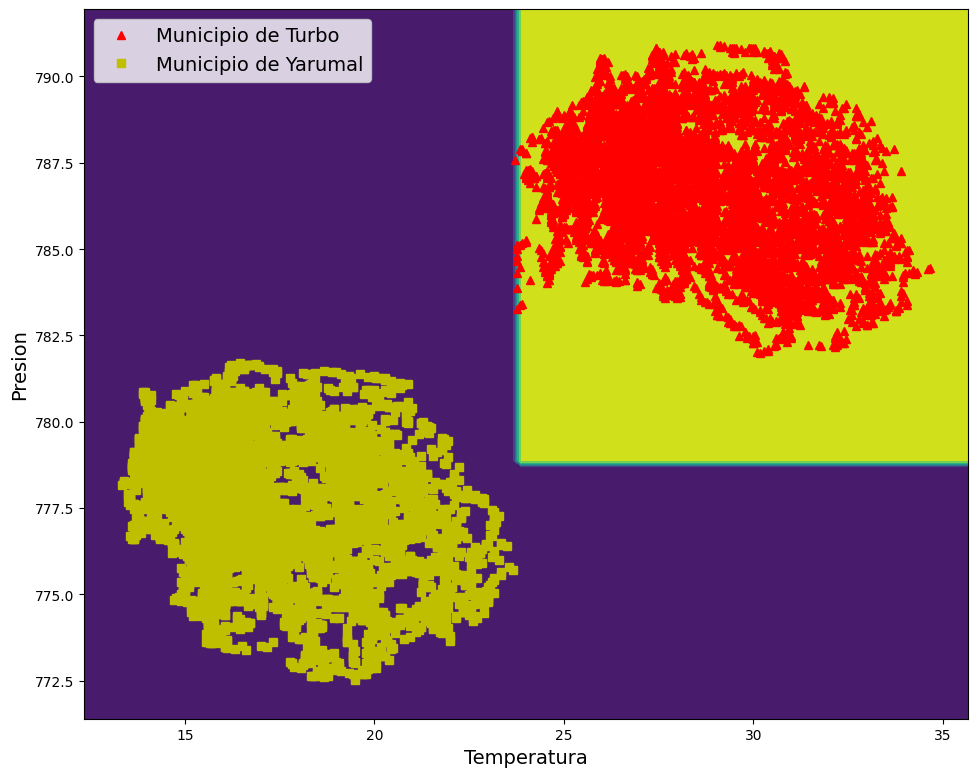

In [56]:

def plot_decision_boundary(clf, X_train, y_train, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred)     # traza la frontera de decision
    plt.plot(X_test[:,0][y_test == 1], X_test[:,1][y_test==1], 'r^', label = 'Municipio de Turbo')
    plt.plot(X_test[:,0][y_test == 0], X_test[:,1][y_test==0], 'ys', label = 'Municipio de Yarumal')
    plt.xlabel('Temperatura')
    plt.ylabel('Presion')
    plt.legend(loc = 'upper left')
    plt.axis(axes)


plt.figure(figsize=(10, 8))   
axes = [X_train[:,0].min() -1,X_train[:,0].max() + 1,X_train[:,1].min() -1,X_train[:,1].max() + 1  ]
plot_decision_boundary(rf_clf, X_test, y_test, axes)

save_fig('clasificacion_turbo_yarumal_con_random_forest')
